# ECG Classification

## Paper: [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Read Dataset

In [35]:
df_train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None)
df_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### show one beat

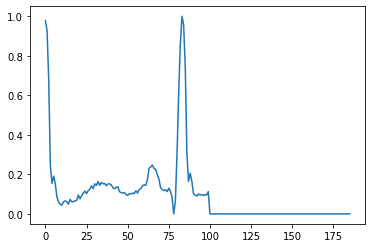

In [36]:
plt.plot(df_train.iloc[0,:186])

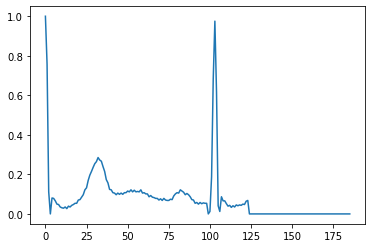

In [37]:
plt.plot(df_test.iloc[0,:186])

## Dataset Equilibre

In [38]:
# plot the circle of value counts in dataset
def plot_equilibre(equilibre):
    plt.figure(figsize=(10,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['skyblue','green','blue','orange','red'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


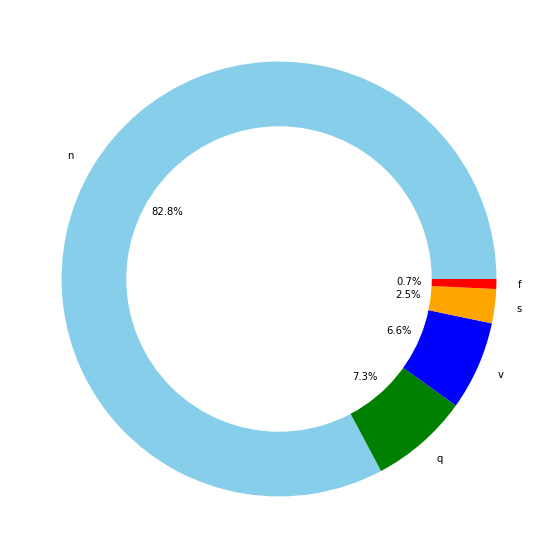

In [39]:
print(df_train[187].value_counts())

plot_equilibre(df_train[187].value_counts())

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


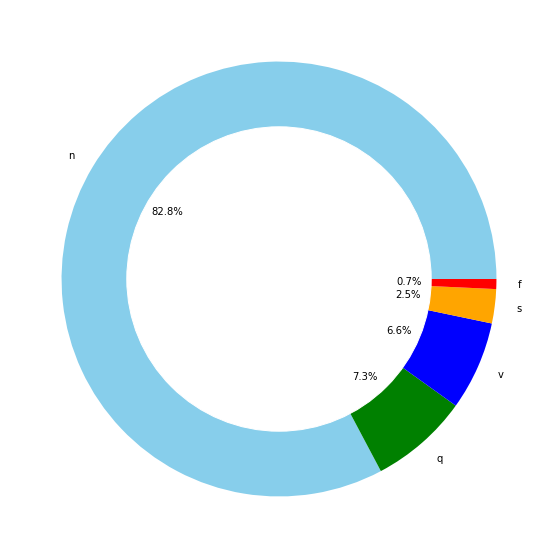

In [40]:
print(df_test[187].value_counts())

plot_equilibre(df_test[187].value_counts())

In [41]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [42]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [43]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [44]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mitbih_test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'mitbih_test.csv'
nRow, nCol = df1.shape
print(f'{nRow} rows and {nCol} columns')

1000 rows and 188 columns


In [45]:
df1.head(5)

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


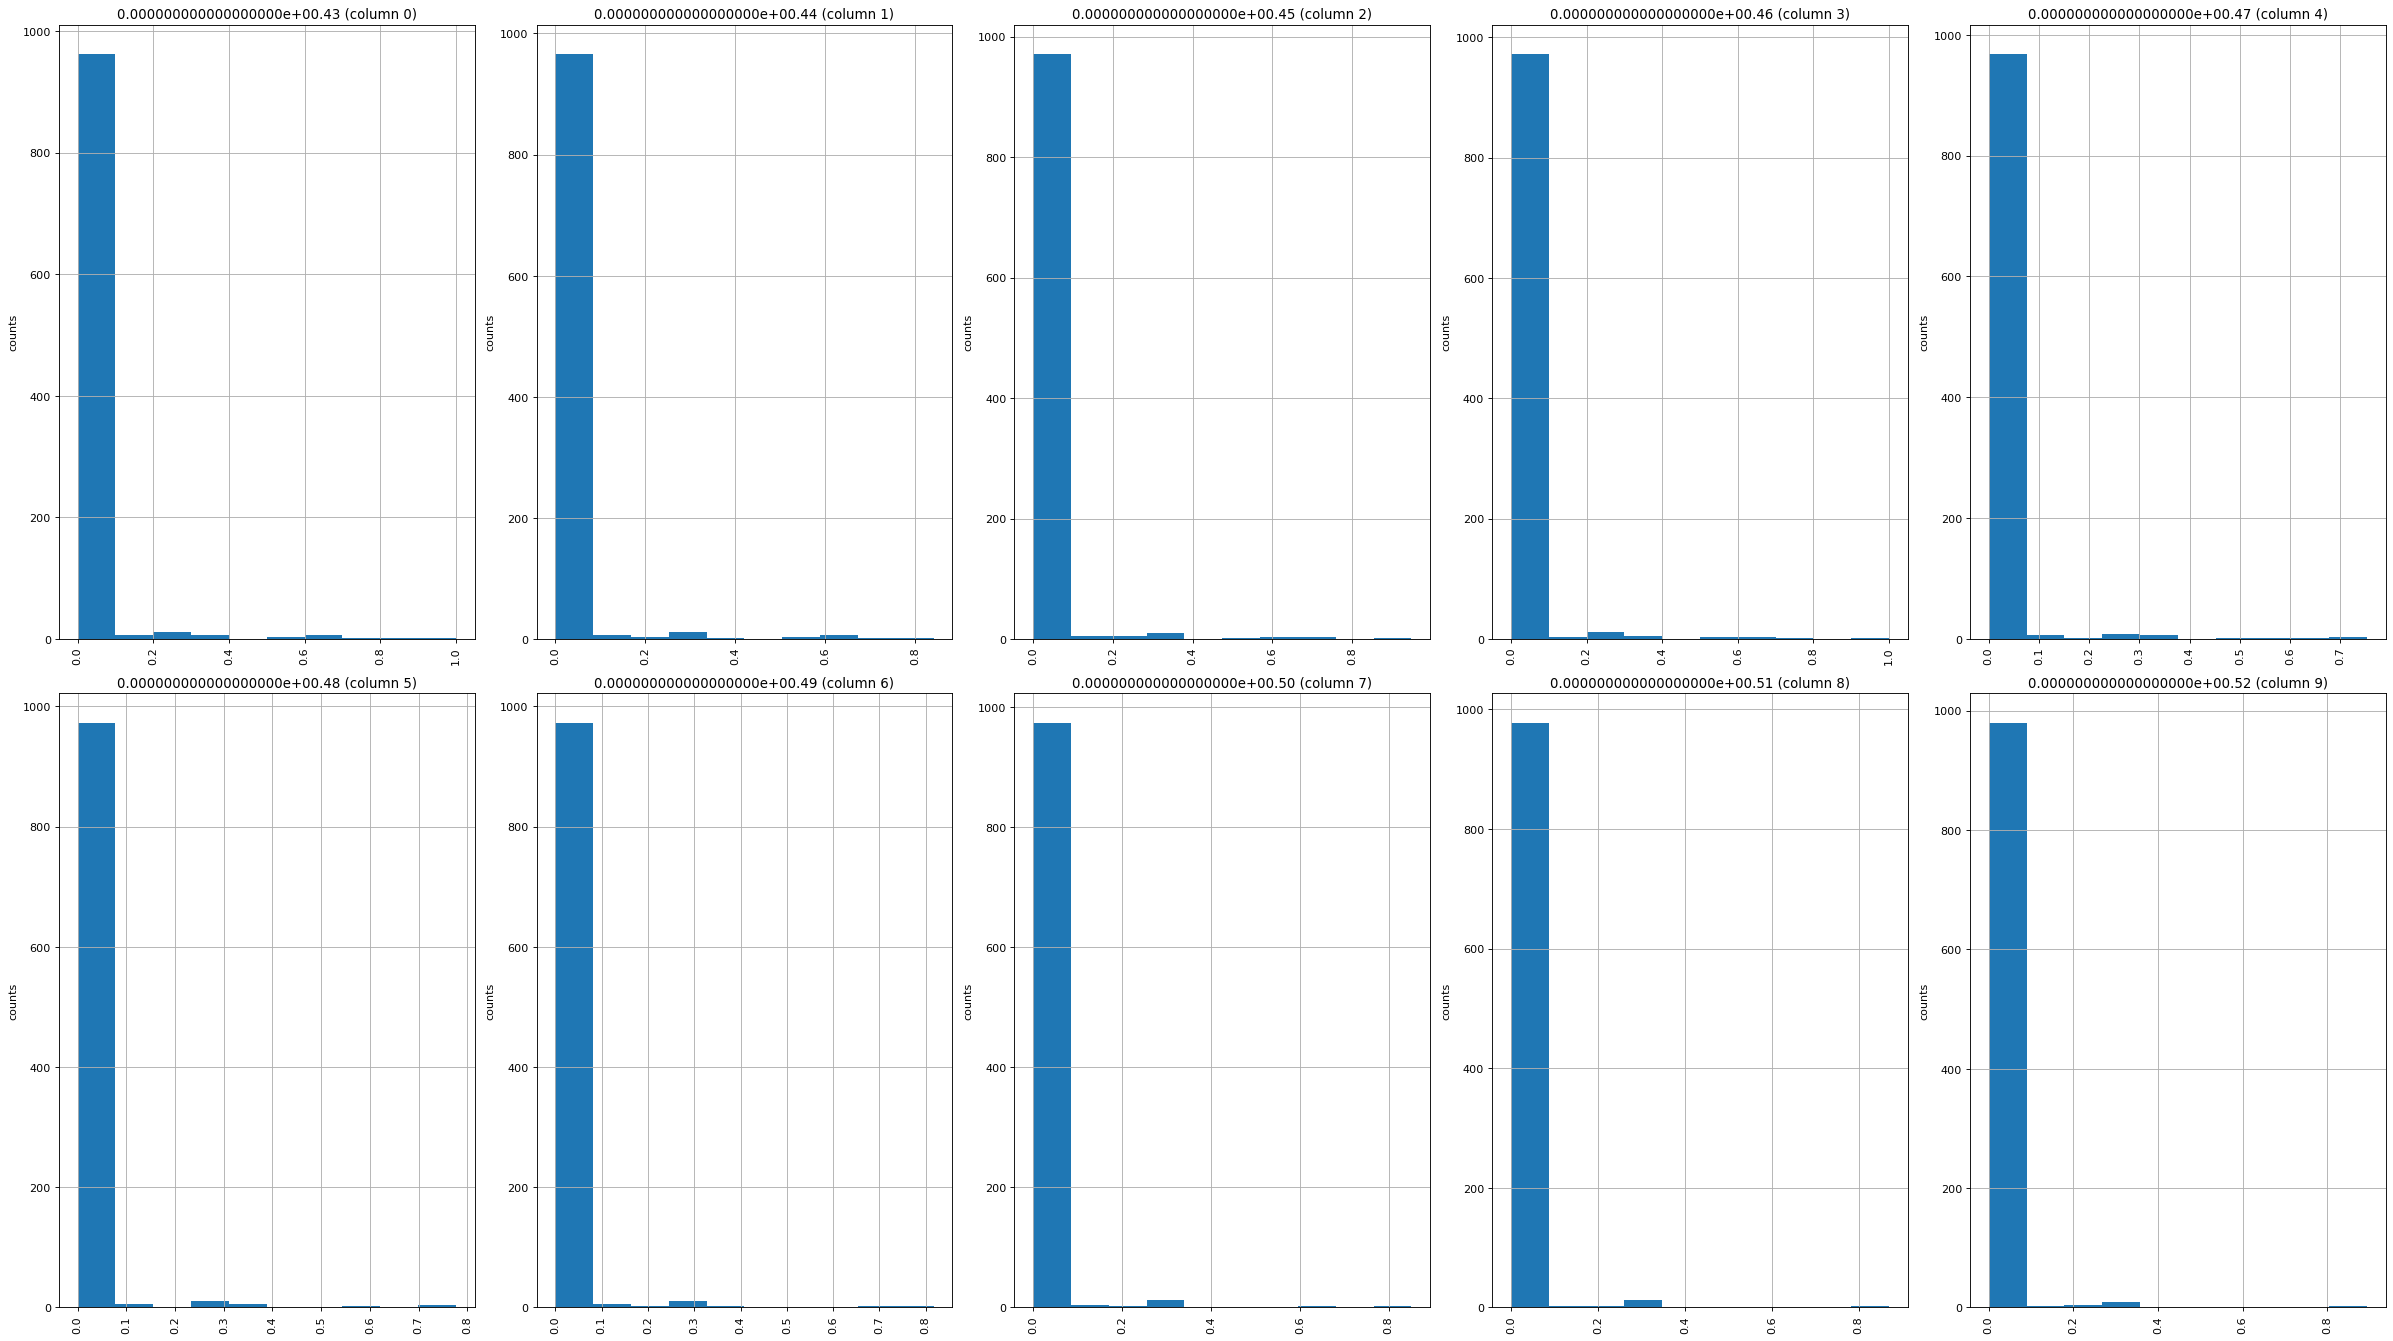

In [46]:
plotPerColumnDistribution(df1, 10, 5)

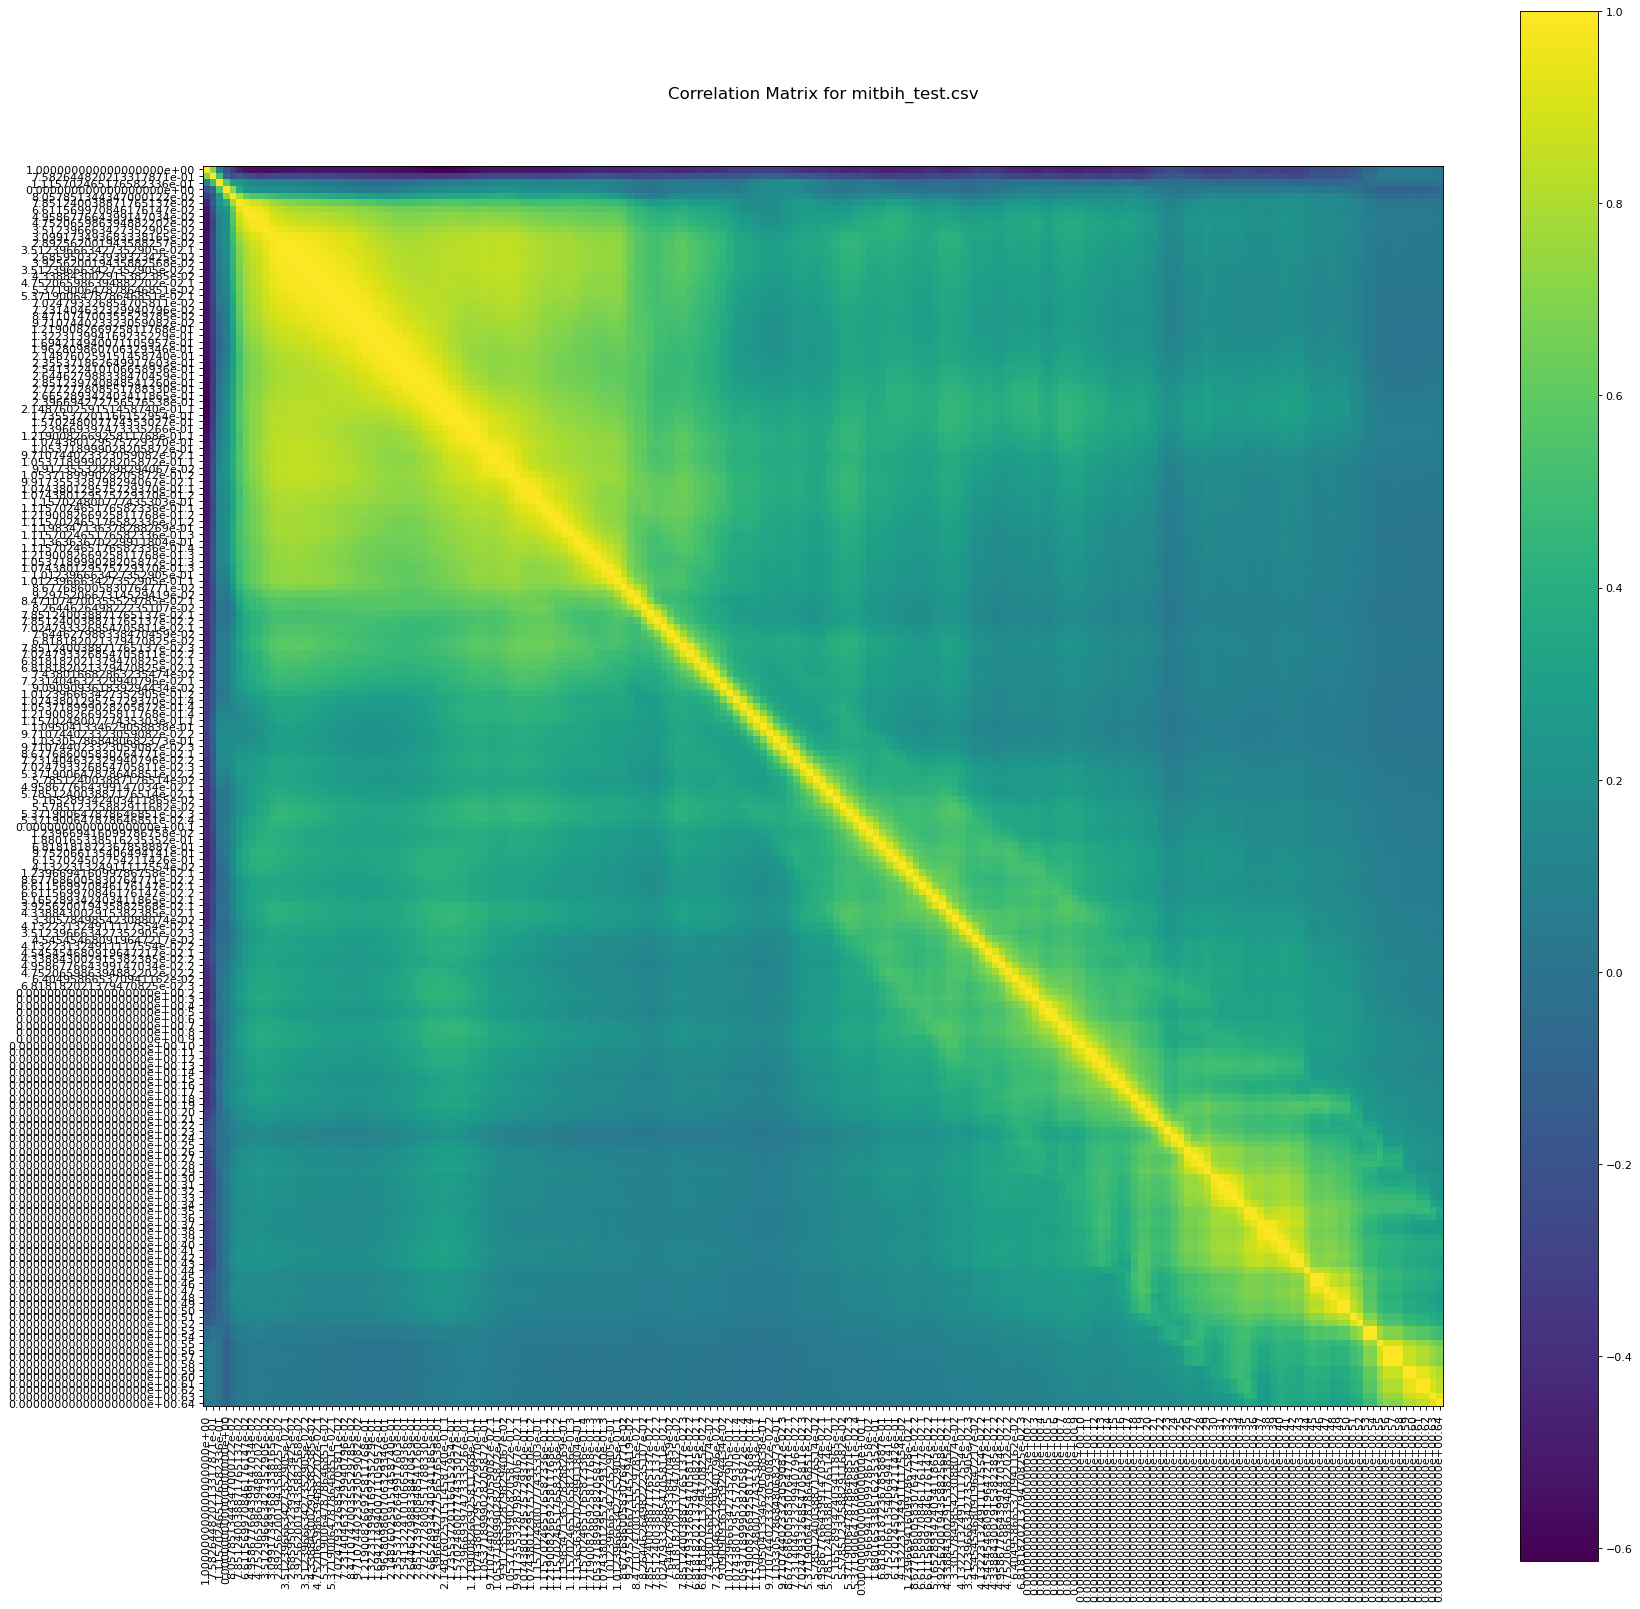

In [47]:
plotCorrelationMatrix(df1, 25)

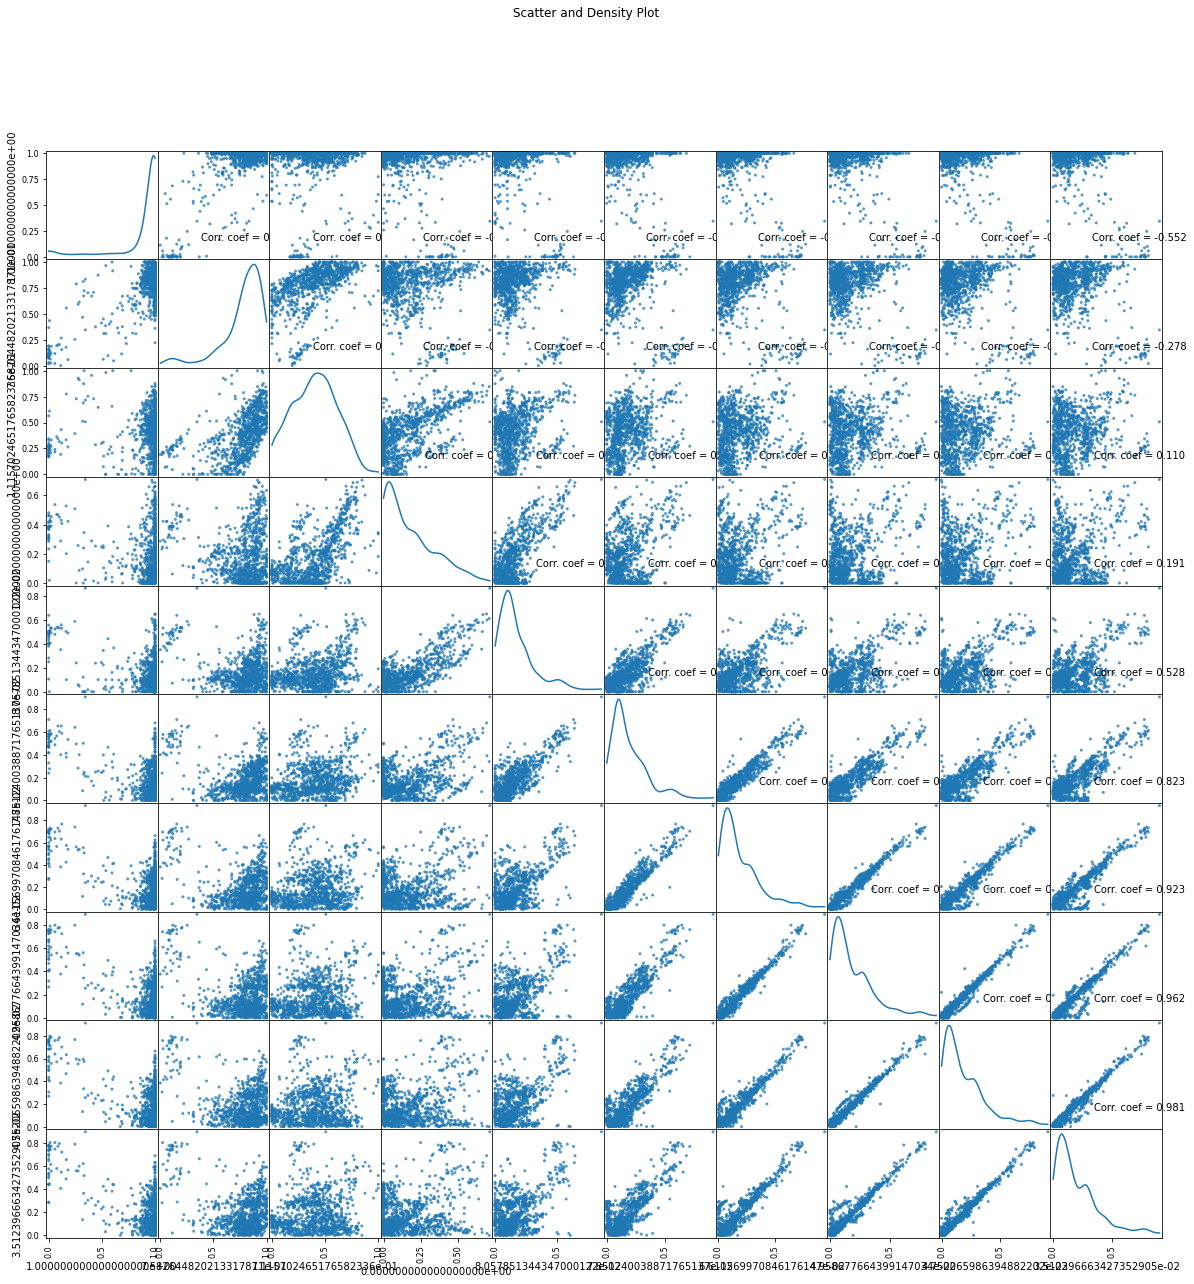

In [48]:
plotScatterMatrix(df1, 20, 10)

In [49]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mitbih_train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'mitbih_train.csv'
nRow, nCol = df2.shape
print(f'{nRow} rows and {nCol} columns')

1000 rows and 188 columns


In [50]:
df2.head(5)

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


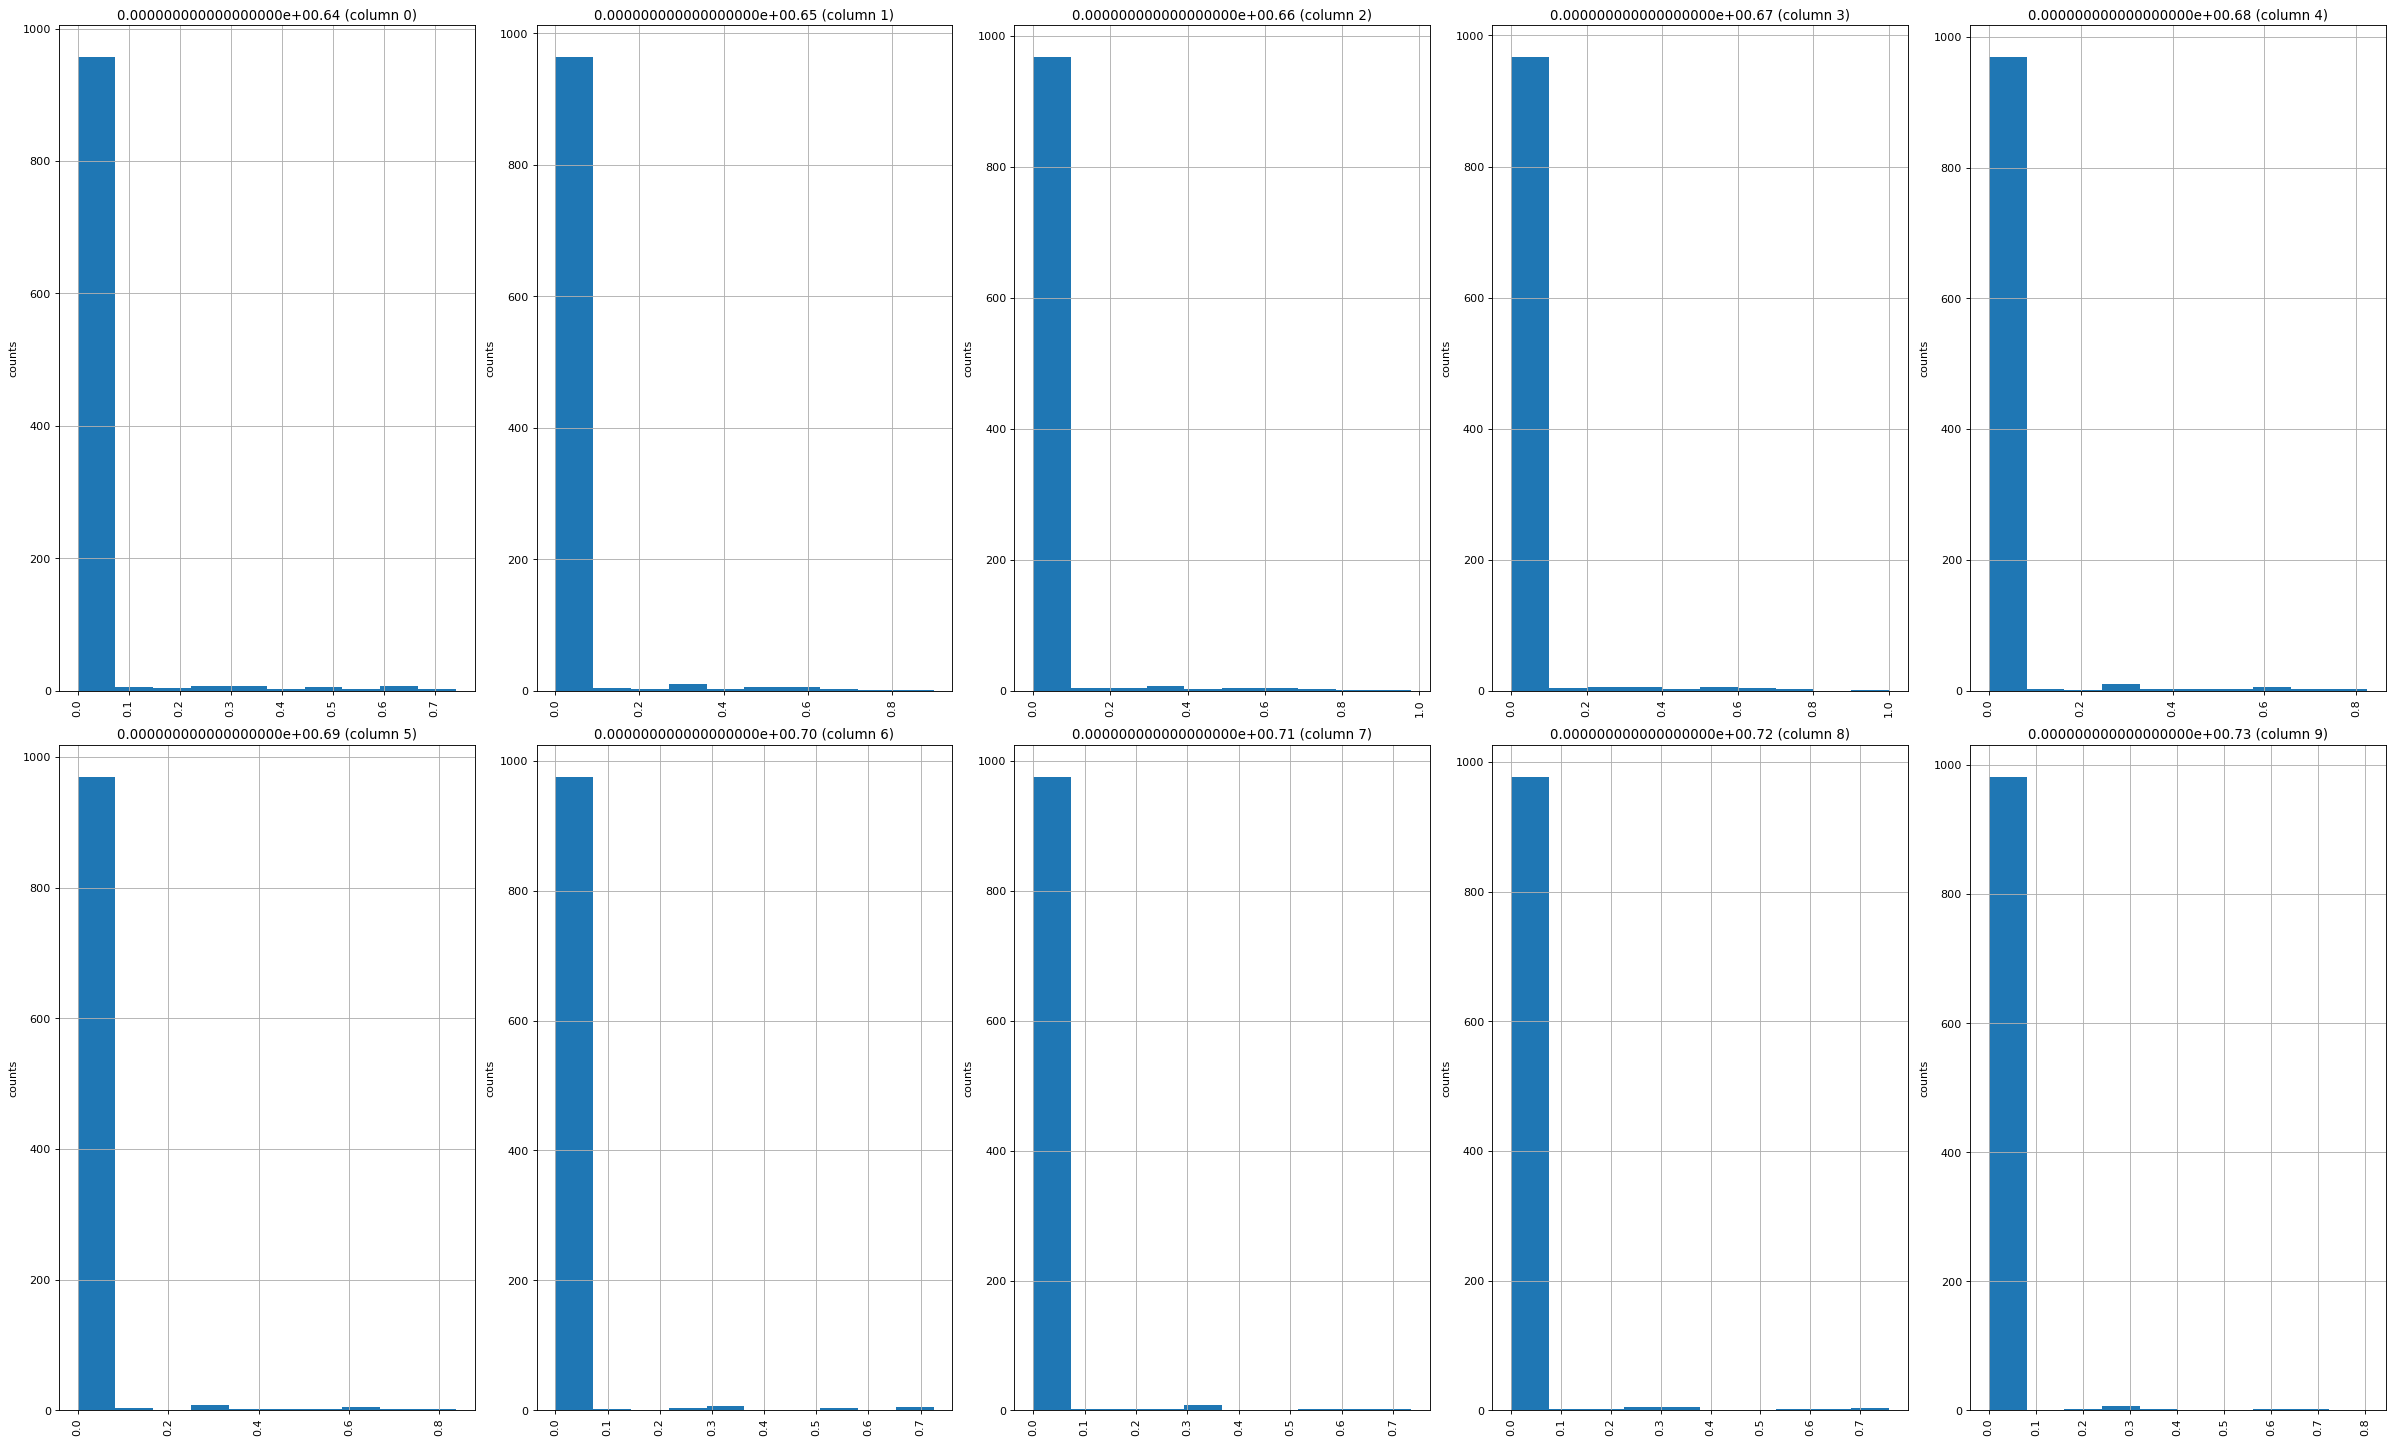

In [51]:
plotPerColumnDistribution(df2, 10, 5)

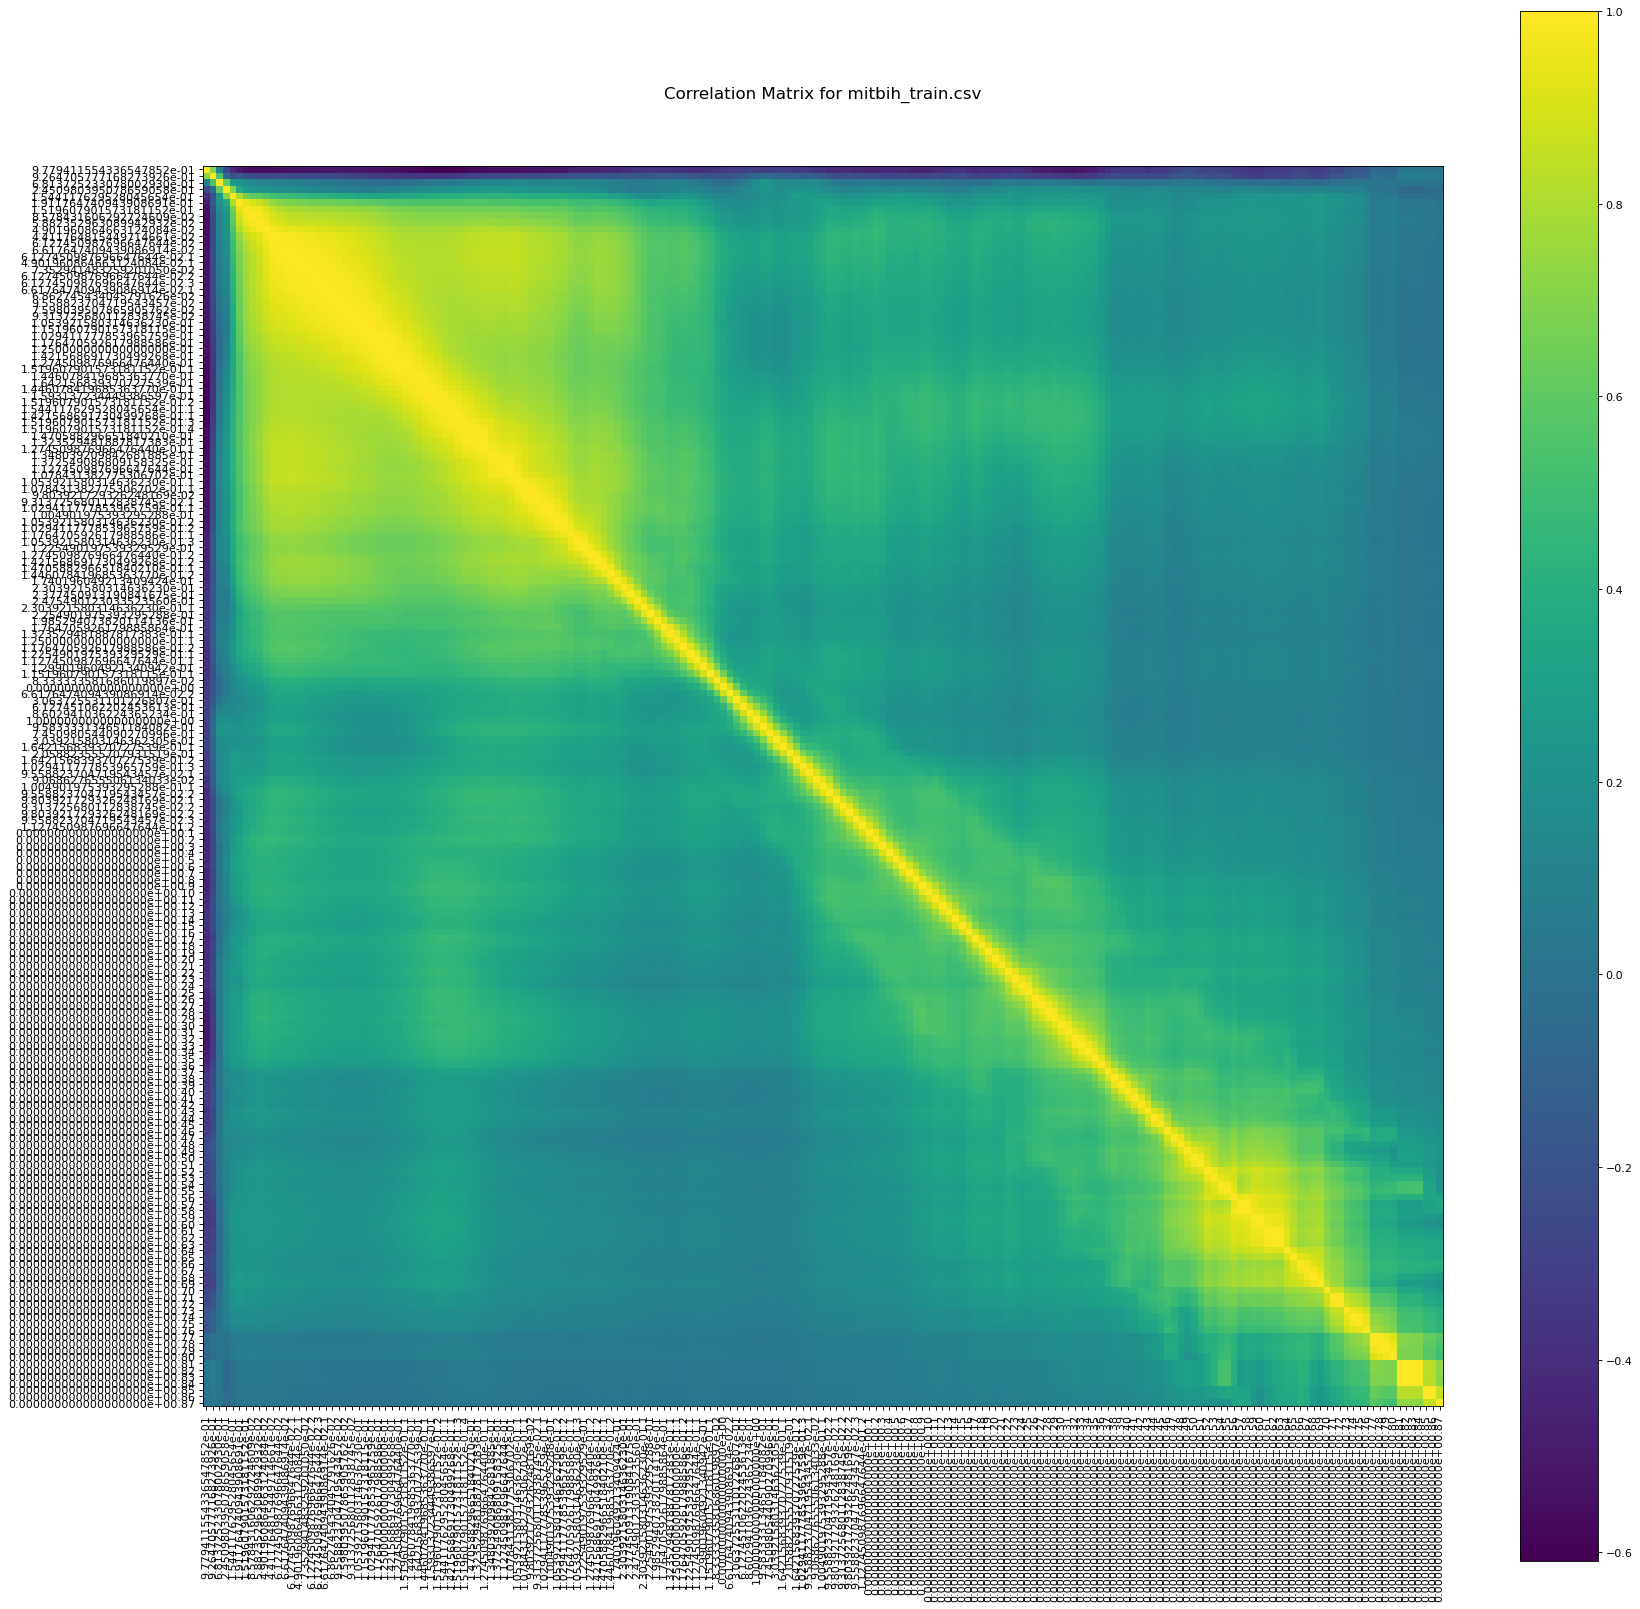

In [52]:
plotCorrelationMatrix(df2, 25)

## Prepare Dataset

In [8]:
X_train = df_train.values[:, :-1]
y_train = df_train.values[:, -1].astype(int)

X_test  = df_test.values[:, :-1]
y_test  = df_test.values[:, -1].astype(int)

### show data

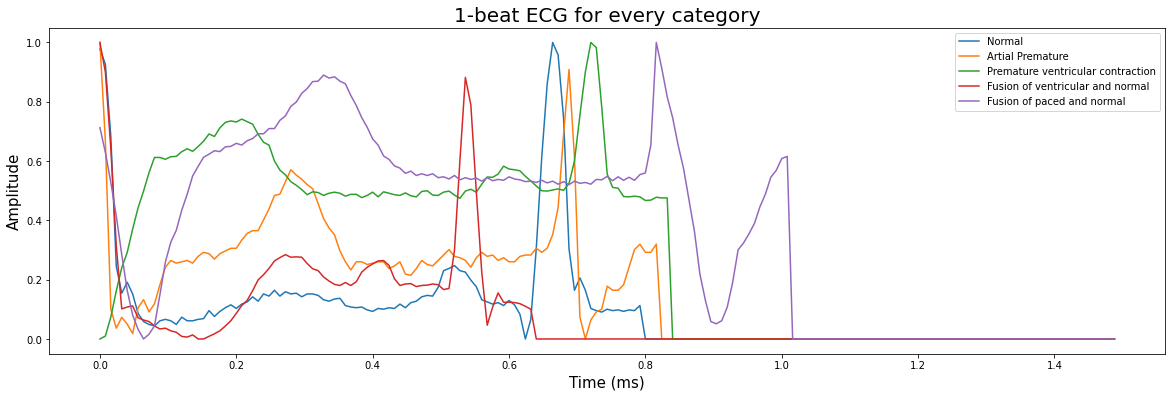

In [9]:
# plot one ECG for each category
C0 = np.argwhere(y_train == 0).flatten()
C1 = np.argwhere(y_train == 1).flatten()
C2 = np.argwhere(y_train == 2).flatten()
C3 = np.argwhere(y_train == 3).flatten()
C4 = np.argwhere(y_train == 4).flatten()

x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,6))
plt.plot(x, X_train[C0, :][0], label="Normal")
plt.plot(x, X_train[C1, :][0], label="Artial Premature")
plt.plot(x, X_train[C2, :][0], label="Premature ventricular contraction")
plt.plot(x, X_train[C3, :][0], label="Fusion of ventricular and normal")
plt.plot(x, X_train[C4, :][0], label="Fusion of paced and normal")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [10]:
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

print(X_train.shape)
print(X_test.shape)

(87554, 187, 1)
(21892, 187, 1)


In [11]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test  = utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(87554, 5)
(21892, 5)


## Build Model

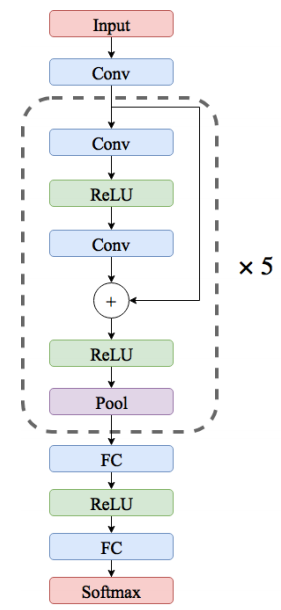

In [12]:
n_obs, feature, depth = X_train.shape
num_classes= 5

In [13]:
# Build Model
from tensorflow.keras import models, layers, optimizers, callbacks

inputs = layers.Input(shape=(feature,depth))
C   = layers.Conv1D(filters=32, kernel_size=5, strides=1)(inputs)

C11 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = layers.Activation("relu")(C11)
C12 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = layers.Add()([C12, C])
A12 = layers.Activation("relu")(S11)
M11 = layers.MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = layers.Activation("relu")(C21)
C22 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = layers.Add()([C22, M11])
A22 = layers.Activation("relu")(S11)
M21 = layers.MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = layers.Activation("relu")(C31)
C32 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = layers.Add()([C32, M21])
A32 = layers.Activation("relu")(S31)
M31 = layers.MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = layers.Activation("relu")(C41)
C42 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = layers.Add()([C42, M31])
A42 = layers.Activation("relu")(S41)
M41 = layers.MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = layers.Activation("relu")(C51)
C52 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = layers.Add()([C52, M41])
A52 = layers.Activation("relu")(S51)
M51 = layers.MaxPooling1D(pool_size=5, strides=2)(A52)

F1  = layers.Flatten()(M51)

D1  = layers.Dense(32)(F1)
A6  = layers.Activation("relu")(D1)
D2  = layers.Dense(32)(A6)

outputs = layers.Dense(num_classes, activation="softmax")(D2)

model = models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 183, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 183, 32)      5152        conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 183, 32)      0           conv1d_1[0][0]                   
_______________________________________________________________________________________

In [14]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [15]:
batch_size = 100
num_epochs = 10 

In [16]:
# Train Model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
876/876 [==============================] - 38s 43ms/step - loss: 0.1991 - accuracy: 0.9437 - val_loss: 0.1218 - val_accuracy: 0.9678
Epoch 2/10
876/876 [==============================] - 39s 44ms/step - loss: 0.0937 - accuracy: 0.9739 - val_loss: 0.0873 - val_accuracy: 0.9764
Epoch 3/10
876/876 [==============================] - 39s 44ms/step - loss: 0.0752 - accuracy: 0.9792 - val_loss: 0.0739 - val_accuracy: 0.9813
Epoch 4/10
876/876 [==============================] - 38s 43ms/step - loss: 0.0630 - accuracy: 0.9817 - val_loss: 0.0752 - val_accuracy: 0.9789
Epoch 5/10
876/876 [==============================] - 37s 42ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0692 - val_accuracy: 0.9810
Epoch 6/10
876/876 [==============================] - 37s 42ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0660 - val_accuracy: 0.9813
Epoch 7/10
876/876 [==============================] - 37s 43ms/step - loss: 0.0463 - accuracy: 0.9861 - val_loss: 0.0619 - val_accuracy:

## Save Model

In [17]:
# Save Model
models.save_model(model, 'ecg_arrhythmia.hdf5')

## Test Model

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

labels = ["Normal",
          "Artial Premature",
          "Premature ventricular contraction",
          "Fusion of ventricular and normal",
          "Fusion of paced and normal"]

In [19]:
# Test Model
predY = model.predict(X_test)
y_pred = np.argmax(predY,axis=1)
y_actual = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[18043    32    40     1     2]
 [  137   402    15     0     2]
 [   36     3  1395    11     3]
 [   29     0    17   115     1]
 [   23     0     6     0  1579]]


In [20]:
print(classification_report(y_actual, y_pred, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.99      1.00      0.99     18118
                 Artial Premature       0.92      0.72      0.81       556
Premature ventricular contraction       0.95      0.96      0.96      1448
 Fusion of ventricular and normal       0.91      0.71      0.80       162
       Fusion of paced and normal       0.99      0.98      0.99      1608

                         accuracy                           0.98     21892
                        macro avg       0.95      0.87      0.91     21892
                     weighted avg       0.98      0.98      0.98     21892



In [54]:
#catboost
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_2d = X_train.squeeze()
X_test_2d = X_test.squeeze()

cb_clf = cb.CatBoostClassifier(loss_function='MultiClass', classes_count=5)
cb_clf.fit(X_train_2d, np.argmax(y_train, axis=1), verbose=100)

Learning rate set to 0.099398
0:	learn: 1.3207118	total: 431ms	remaining: 7m 10s
100:	learn: 0.1248330	total: 30s	remaining: 4m 27s
200:	learn: 0.0991390	total: 54.4s	remaining: 3m 36s
300:	learn: 0.0870986	total: 1m 17s	remaining: 3m
400:	learn: 0.0776834	total: 1m 42s	remaining: 2m 33s
500:	learn: 0.0708209	total: 2m 7s	remaining: 2m 6s
600:	learn: 0.0649012	total: 2m 32s	remaining: 1m 41s
700:	learn: 0.0603089	total: 2m 56s	remaining: 1m 15s
800:	learn: 0.0562279	total: 3m 20s	remaining: 49.9s
900:	learn: 0.0526171	total: 3m 46s	remaining: 24.8s
999:	learn: 0.0493637	total: 4m 10s	remaining: 0us


In [55]:
y_pred = cb_clf.predict(X_test_2d)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.75%


In [58]:
# 数据是DataFrame格式
X_train_df = pd.DataFrame(X_train_2d)
X_test_df = pd.DataFrame(X_test_2d)

# 转换类别特征的数据类型为字符串
cat_features = [1, 2, 5]  # 假设这是你的类别特征
for feature in cat_features:
    X_train_df[feature] = X_train_df[feature].astype('str')
    X_test_df[feature] = X_test_df[feature].astype('str')

# 然后按照之前的方式进行训练和预测
cb_clf = cb.CatBoostClassifier(loss_function='MultiClass', classes_count=5, cat_features=cat_features,
                               early_stopping_rounds=30, iterations=1000, learning_rate=0.1, depth=7)
cb_clf.fit(X_train_df, np.argmax(y_train, axis=1), verbose=100)
y_pred = cb_clf.predict(X_test_df)

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# 特征重要性
feature_importances = cb_clf.get_feature_importance()
print("Feature Importances: ", feature_importances)


0:	learn: 1.3131824	total: 1.38s	remaining: 23m 3s
100:	learn: 0.1229156	total: 2m 34s	remaining: 22m 59s
200:	learn: 0.0951516	total: 5m 10s	remaining: 20m 32s
300:	learn: 0.0827794	total: 7m 43s	remaining: 17m 55s
400:	learn: 0.0731004	total: 10m 16s	remaining: 15m 21s
500:	learn: 0.0658457	total: 12m 49s	remaining: 12m 46s
600:	learn: 0.0607248	total: 15m 23s	remaining: 10m 12s
700:	learn: 0.0558819	total: 17m 59s	remaining: 7m 40s
800:	learn: 0.0518229	total: 20m 33s	remaining: 5m 6s
900:	learn: 0.0478729	total: 23m 10s	remaining: 2m 32s
999:	learn: 0.0450128	total: 25m 43s	remaining: 0us
Accuracy: 97.62%
Feature Importances:  [5.80516147e+00 4.88178058e-01 5.96061693e-01 9.97257310e+00
 5.45689361e+00 3.04938071e-01 3.82883849e+00 2.06967245e+00
 1.55557831e+00 1.57484751e+00 1.71315225e+00 8.65226785e-01
 1.33213840e+00 1.05142441e+00 9.28274279e-01 6.38343416e-01
 7.35394800e-01 4.37509989e-01 5.09193823e-01 3.90803104e-01
 8.90643448e-01 4.26454224e-01 7.11003300e-01 9.29979406

In [64]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier


# 定义3个CatBoost分类器
cb_clf1 = CatBoostClassifier(loss_function='MultiClass', classes_count=2, early_stopping_rounds=30, iterations=1000, learning_rate=0.1, depth=7, verbose=0)
cb_clf2 = CatBoostClassifier(loss_function='MultiClass', classes_count=2, early_stopping_rounds=30, iterations=1200, learning_rate=0.05, depth=6, verbose=0)
cb_clf3 = CatBoostClassifier(loss_function='MultiClass', classes_count=2, early_stopping_rounds=30, iterations=800, learning_rate=0.15, depth=8, verbose=0)

# 创建投票分类器
voting_clf = VotingClassifier(estimators=[('cb_1', cb_clf1), ('cb_2', cb_clf2), ('cb_3', cb_clf3)], voting='hard')

# 创建多输出分类器
multi_target_clf = MultiOutputClassifier(voting_clf)

# Fit the multi-output classifier and make predictions
multi_target_clf.fit(X_train_2d, y_train)
y_pred = multi_target_clf.predict(X_test_2d)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


ValueError: y should be a 1d array, got an array of shape (1, 3) instead.

In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_clf_best = xgb_clf_best  # 训练好的XGBoost模型
cb_clf = cb_clf  # 训练好的CatBoost模型

NameError: name 'xgb_clf_best' is not defined

In [21]:
# Xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
X_train_2d = X_train.squeeze()
X_test_2d = X_test.squeeze()

In [24]:
#1 xgboost grid search
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5)
xgb_clf.fit(X_train_2d, np.argmax(y_train, axis=1))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
#2 xgboost
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)


# Create a XGBClassifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5, n_estimators=100, max_depth=3)

# Fit the classifier on the reshaped training data
xgb_clf.fit(X_train_2d, np.argmax(y_train, axis=1))

# Make predictions on the reshaped test data
y_pred = xgb_clf.predict(X_test_2d)

# Calculate the accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.04%


In [25]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0]
}

# Create a XGBClassifier
xgb_clf = XGBClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search object on the training data
grid_search.fit(X_train_2d, np.argmax(y_train, axis=1))

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best score:", best_score)

KeyboardInterrupt: 

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5)

grid_search = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train_2d, np.argmax(y_train, axis=1))

In [26]:
# best parameter to train model
best_params = grid_search.best_params_
xgb_clf_best = xgb.XGBClassifier(**best_params, objective='multi:softmax', num_class=5)
xgb_clf_best.fit(X_train_2d, np.argmax(y_train, axis=1))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'